Text(0.5, 0, 'VENDEDORES')

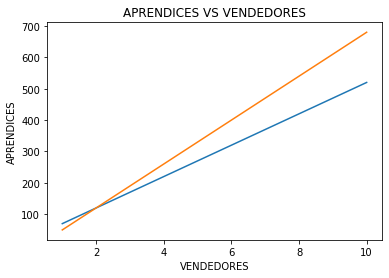

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def df_dt(x, t, Vendedores, Aprendices, tiempoPermanencia, tiempoAprendizaje, capacidadVentas, estimacionDemanda):
    contratacion = Aprendices*capacidadVentas*estimacionDemanda
    aprendicesVendedores = Aprendices*tiempoAprendizaje
    vendedoresAbandonan = Vendedores*tiempoPermanencia
    return np.array([Vendedores, Aprendices, contratacion, aprendicesVendedores, vendedoresAbandonan])

# Parámetros
Aprendices = 70
Vendedores = 50
numPeriodicos = 5
ventasReales = 20
tiempoPermanencia = 100
tiempoAprendizaje = 10
estimacionDemanda = ventasReales * 0.05
capacidadVentas = Vendedores /tiempoPermanencia

# Condiciones iniciales
x0 = 70
y0 = 50
z0 = 0
a0 = 0
b0 = 0

conds_iniciales = np.array([x0, y0, z0, a0, b0])

# Condiciones para integración
tf = 10
N = 1000

t = np.linspace(1, tf, N)
solucion = odeint(df_dt, conds_iniciales, t, args=(Vendedores, Aprendices, tiempoPermanencia, tiempoAprendizaje, capacidadVentas, estimacionDemanda))

plt.plot(t, solucion[:, 0], label='Vendedores') 
plt.plot(t, solucion[:, 1], label='Aprendices') 
plt.title("APRENDICES VS VENDEDORES")
plt.ylabel("APRENDICES")
plt.xlabel("VENDEDORES")